# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. 

# Инструкция по выполнению проекта

1. Откройть файл с данными и изучите его.
2. Разделить исходные данные на обучающую, валидационную и тестовую выборки.
3. Исследовать качество разных моделей, меняя гиперпараметры. Кратко написать выводы исследования.
4. Проверить качество модели на тестовой выборке.
5. Дополнительное задание: проверить модели на вменяемость. 

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')# Получение таблицы

In [3]:
data.info() # Информация о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
data = data.astype({'calls': 'int64', 'messages':'int64', 'is_ultra':'bool'})# изменение типов данных 

In [6]:
data.duplicated().sum() # количество дубликатов в таблице

0

In [7]:
data.isna().sum() # число пропущенных значения по столбцам

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

В таблице отсутствуют дубликаты и пропущенные значения. Изменим тип данных в столбцах `calls` и `messages` на `int`, поскольку данные в этих столбцах могут принимать только целочисленные значения. Также значения в столбце `is_ultra` могут принимать только два значения, поэтому поменяем тип данных на `bool`.

## Разбейте данные на выборки

In [8]:
features = data.drop('is_ultra', axis=1) # признаки кроме целевого
target = data['is_ultra'] # целевой признак

In [9]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)# отделяем 60% данных для обучающей выборки

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345,stratify=target_valid_test) # получаем по 20% от начальных данных для тестовой и валидационной выборки

Исходные данные разбили в соотношении 3:1:1 для обучающей, тестовой и валидационной выборок соответственно.

In [10]:
print('Shape для features_train', features_train.shape)
print('Shape для features_valid', features_valid.shape)
print('Shape для features_test', features_test.shape)

Shape для features_train (1928, 4)
Shape для features_valid (643, 4)
Shape для features_test (643, 4)


## Исследуйте модели

### Дерево

In [11]:
best_max_depth_tree = 0
best_accuracy_tree = 0
accuracy_tree_list_valid = []
accuracy_tree_list_train= []
best_model_tree = None
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) #меняем максимально возможную глубину дерева
    model.fit(features_train, target_train) # обучение модели 
    
    predictions_valid = model.predict(features_valid) # получение предсказания
    predictions_train = model.predict(features_train) # получение предсказания
    accuracy_value_valid = accuracy_score(target_valid, predictions_valid) # вычисление значения accuracy
    accuracy_value_train = accuracy_score(target_train, predictions_train)
    
    accuracy_tree_list_valid.append(accuracy_value_valid)
    accuracy_tree_list_train.append(accuracy_value_train)
    
    if accuracy_value_valid > best_accuracy_tree: #поиск наилучшей глубины, наилучшего значения accuracy
        best_accuracy_tree = accuracy_value_valid
        best_max_depth_tree = depth
        best_model_tree = model
        
print('Лучшее мнимальное значение глубины дерева для значений глубины от 1 до 10:', best_max_depth_tree)
print("Accuracy наилучшей модели на валидационной выборке:", best_accuracy_tree)

Лучшее мнимальное значение глубины дерева для значений глубины от 1 до 10: 8
Accuracy наилучшей модели на валидационной выборке: 0.80248833592535


Наибольшая точность получается при глубине дерва 3, если рассматривать дервья с максимальной глубиной от 1 до 5.

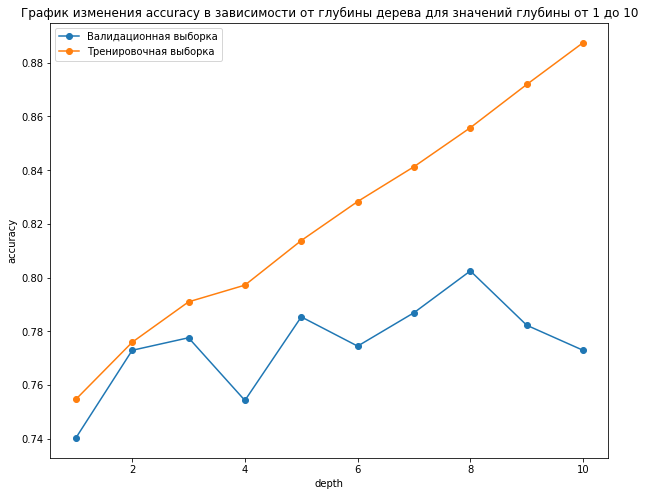

In [12]:
plt.figure(figsize=(10,8))
plt.title('График изменения accuracy в зависимости от глубины дерева для значений глубины от 1 до 10')
plt.plot(range(1, 11, 1), accuracy_tree_list_valid,'-o', label='Валидационная выборка')
plt.plot(range(1, 11, 1), accuracy_tree_list_train,'-o', label='Тренировочная выборка')
plt.legend()
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()

При увеличении `depth`, начиная с 8, происходит переобучение модели для валидационной выборки, для тренировочной выборки переобучение не происходит.

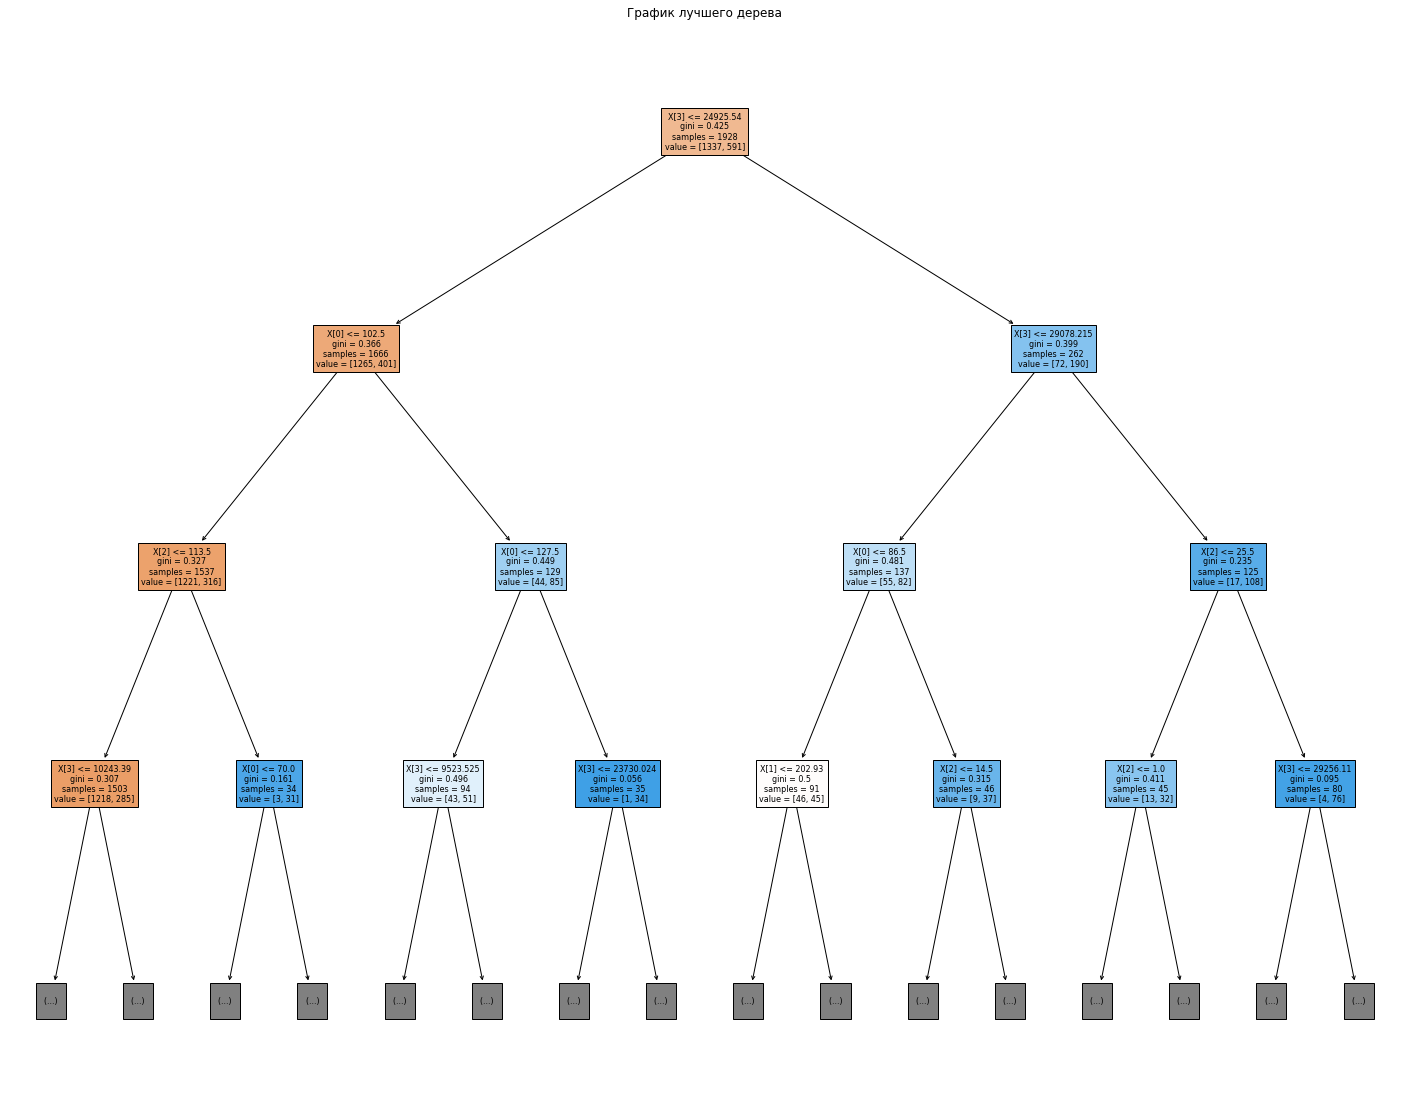

In [21]:
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(best_model_tree, max_depth=3, filled=True);
plt.title("График лучшего дерева");

### Случайный лес

In [14]:
%%time
best_number_forest = 0
best_max_depth_forest = 0
best_accuracy_forest = 0
best_model_forest = None
accuracy_forest_list_valid = []
accuracy_forest_list_train= []

for est in range(10, 51, 10):# меняем число деревьев от 10 до 50 с шагом 10
    for depth in range(1, 11): # меняем глубину дервьев от 1 до 10
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result_valid = model.score(features_valid, target_valid) # вычисление значения accuracy
        result_train = model.score(features_train, target_train)
        
        accuracy_forest_list_valid.append(result_valid)
        accuracy_forest_list_train.append(result_train)

        if result_valid > best_accuracy_forest:
            best_max_depth_forest = depth
            best_number_forest = est
            best_accuracy_forest = result_valid#  сохраняем наилучшее значение метрики accuracy на валидационных данных
            best_model_forest = model
        
print('Лучшее число деревьев для значений от 10 до 50 c шагом 10:', best_number_forest)
print('Лучший вариант глубины деревьев от 1 до 10:', best_max_depth_forest )
print("Accuracy наилучшей модели на валидационной выборке:", best_accuracy_forest)

Лучшее число деревьев для значений от 10 до 50 c шагом 10: 40
Лучший вариант глубины деревьев от 1 до 10: 9
Accuracy наилучшей модели на валидационной выборке: 0.8211508553654744
CPU times: user 3.58 s, sys: 20 ms, total: 3.6 s
Wall time: 3.6 s


Наибольшая точность получается, когда максимальное количество дервьев = 40 (для деревьев с максимальной высотой от 10 до 50 с шагом 10), если глубина деревьев = 8 (для деревьев с глубиной от 1 до 10).

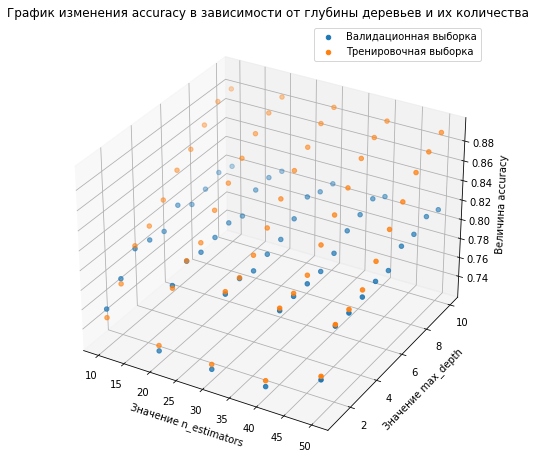

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title("График изменения accuracy в зависимости от глубины деревьев и их количества") 
ax.set_xlabel("Значение n_estimators")
ax.set_ylabel("Значение max_depth")
ax.set_zlabel("Величина accuracy")

x = []
y= []
for k in range(10, 51, 10):
    x += [k]*10
    
    y += list(range(1, 11)) 
   
ax.scatter(x, y, accuracy_forest_list_valid, label='Валидационная выборка')
ax.scatter(x, y, accuracy_forest_list_train, label='Тренировочная выборка')
plt.legend()
plt.show();

### Логистическая регрессия

In [16]:
best_max_iter_number = 0
best_accuracy_regression = 0
best_model_regression = None
accuracy_regression_list_valid =[]
for iter_number in range(100, 1001, 100):#меняем максимальное число итераций
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter_number) # Логистическая регрессия с алгоритмом 'lbfgs'
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    accuracy_regression_list_valid.append(result)
    if result > best_accuracy_regression:
        best_max_iter_number = iter_number
        best_accuracy_regression = result#  сохраняем наилучшее значение метрики accuracy на валидационных данных
        best_model_regression = model

    
print('Лучшее минимальное значение максимального числа итераций для значений от 100 до 1000 с шагом 100:', best_max_iter_number)
print("Accuracy наилучшей модели на валидационной выборке:", best_accuracy_regression) 

Лучшее минимальное значение максимального числа итераций для значений от 100 до 1000 с шагом 100: 100
Accuracy наилучшей модели на валидационной выборке: 0.7387247278382582


Наибольшая точность получается при максимальном числе итераций 100, если использовать логистические регрессии со значениями от 100 до 1000 и шагом 100 для алгоритма 'lbfgs'.

## Проверьте модель на тестовой выборке

Обучим лучшую модель на тренировочных и валидационных данных.

In [17]:
best_model_forest.fit(pd.concat([features_train, features_valid]), pd.concat([target_train, target_valid]));

In [18]:
print('Accuracy для лучшего случайного леса:', best_model_forest.score(features_test, target_test))

Accuracy для лучшего случайного леса: 0.8289269051321928


Лучший результат показала модель случайного леса среди трех наилучших моделей (дерево, случайный лес, логическая регрессия). 

## (бонус) Проверьте модели на адекватность

In [19]:
dummy_clf = DummyClassifier(strategy="most_frequent") # "модель-пустышка"
dummy_clf.fit(features_train, target_train)
dummy_clf_accuracy = dummy_clf.score(features_test, target_test) 

decision_tree_difference = best_model_tree.score(features_test, target_test) - dummy_clf_accuracy 
    
decision_forest_difference = best_model_forest.score(features_test, target_test) - dummy_clf_accuracy 
    
regression_difference = best_model_regression.score(features_test, target_test) - dummy_clf_accuracy 
                                 
                                 
print('Разница между accuracy наилучшей модели и "моделью-пустышкой" для дерева:',
      decision_tree_difference)
print('Разница между accuracy наилучшей модели и "моделью-пустышкой" для случайного леса:',
      decision_forest_difference)
print('Разница между accuracy наилучшей модели и "моделью-пустышкой" для логической регрессии :', 
      regression_difference)


Разница между accuracy наилучшей модели и "моделью-пустышкой" для дерева: 0.09020217729393476
Разница между accuracy наилучшей модели и "моделью-пустышкой" для случайного леса: 0.13530326594090203
Разница между accuracy наилучшей модели и "моделью-пустышкой" для логической регрессии : 0.05287713841368591


Наибольшая разница значений accuracy получилась для лучшей модели случайного леса и "модели-пустышки" для трех вариантов модели (дерево, случайный лес, логическая регрессия). Это может означать, что полученная модель случайного леса наиболее адекватна. 

## Вывод

В ходе исследования найдена модель с наибольшим значением accuracy для валидационной выборки — "случайный лес" c числом деревьев 40 и глубиной 8. Наибольшая разница значений accuracy получилась для данной модели и "модели-пустышки" среди трех лучших моделей  ("дерево", "случайный лес", "логическая регрессия") случайный лес обладает самой высокой адекватностью для тестовой выборки.

Возможно, для предоставленных данных случайный лес показывает лучший результат, поскольку в результате голосования деревьев, выбираются лучшие предсказания, чем при использовании одного дерева или логистической регрессии, которая осуществляет классификацию, вычисляя вероятность попадания значений в определенный класс. Вероятно, у модели логистической регрессии хуже возвращаемые предсказания, поскольку меньше гиперпараметров, чем у случайного леса и ее сложнее настроить для получения наиболее точных значений. 